IMPORT LIBRARIES

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import joblib


LOAD THE DATASET

In [17]:
df = pd.read_csv('flights.csv')


INSPECT THE DATA

In [18]:
df.head()

,DEPARTURE_DELAY,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,TAXI_OUT,ARRIVAL_DELAY
0,92,AS,JFK,SFO,2108,10,98
1,82,SW,PHX,JFK,1152,21,90
2,4,UA,LAX,JFK,2015,14,-1
3,96,UA,PHX,LAS,155,5,117
4,61,AA,CLT,DFW,922,7,49


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   DEPARTURE_DELAY      1000 non-null   int64 
 1   AIRLINE              1000 non-null   object
 2   ORIGIN_AIRPORT       1000 non-null   object
 3   DESTINATION_AIRPORT  1000 non-null   object
 4   SCHEDULED_DEPARTURE  1000 non-null   int64 
 5   TAXI_OUT             1000 non-null   int64 
 6   ARRIVAL_DELAY        1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


HANDLE MISSING VALUES

In [20]:
print(df.columns)

Index(['DEPARTURE_DELAY', 'AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'TAXI_OUT', 'ARRIVAL_DELAY'],
      dtype='object')


In [21]:
# Fill missing values
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].fillna(df['ARRIVAL_DELAY'].mean())
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].fillna(df['DEPARTURE_DELAY'].mean())
df['TAXI_OUT'] = df['TAXI_OUT'].fillna(df['TAXI_OUT'].mean())
df['AIRLINE'] = df['AIRLINE'].fillna(df['AIRLINE'].mode()[0])
df['ORIGIN_AIRPORT'] = df['ORIGIN_AIRPORT'].fillna(df['ORIGIN_AIRPORT'].mode()[0])
df['DESTINATION_AIRPORT'] = df['DESTINATION_AIRPORT'].fillna(df['DESTINATION_AIRPORT'].mode()[0])
df['SCHEDULED_DEPARTURE'] = df['SCHEDULED_DEPARTURE'].fillna(df['SCHEDULED_DEPARTURE'].mode()[0])

VISUALIZATION

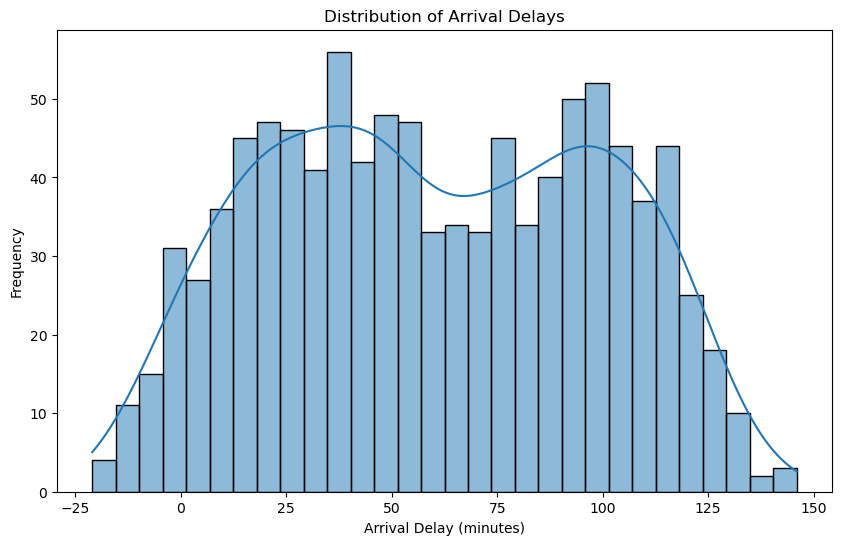

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization 1: Distribution of Arrival Delays
plt.figure(figsize=(10, 6))
sns.histplot(df['ARRIVAL_DELAY'], kde=True, bins=30)
plt.title('Distribution of Arrival Delays')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.show()


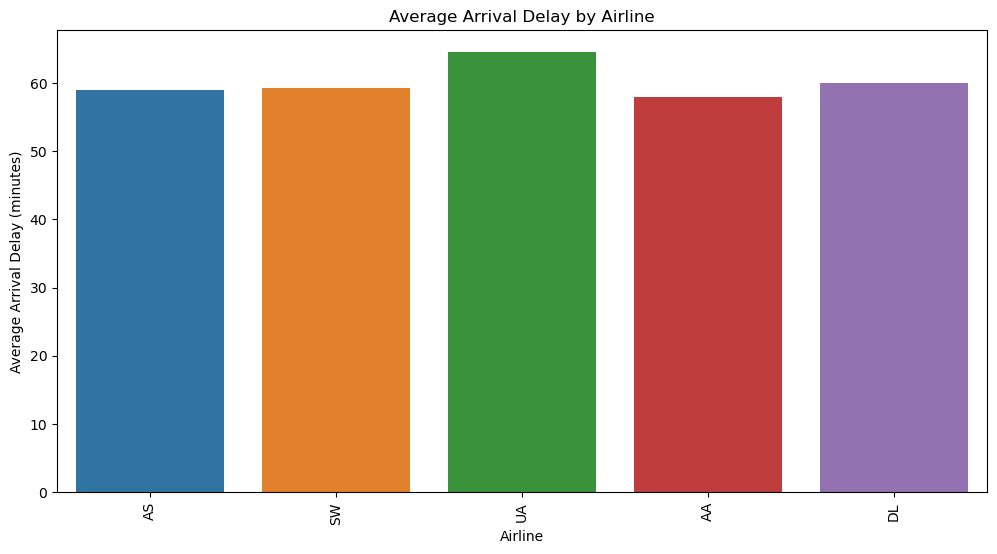

In [23]:
# Visualization 2: Average Arrival Delay by Airline
plt.figure(figsize=(12, 6))
sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY', data=df, estimator='mean', errorbar=None)
plt.title('Average Arrival Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Arrival Delay (minutes)')
plt.xticks(rotation=90)
plt.show()


FEATURE ENGINEERING

1. encode categorical features

In [24]:
# One-hot encoding
categorical_cols = ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_features = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols))

In [25]:
# Merge with numeric features
df = df.drop(columns=categorical_cols)
df = pd.concat([df.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)

2. drop unnecessary columns

3. feature selection

In [26]:
X = df.drop(columns=['ARRIVAL_DELAY'])
y = df['ARRIVAL_DELAY']


SCALING FEATURES

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


TRAIN THE MODEL

In [28]:
from sklearn.ensemble import RandomForestRegressor

# Train the model
model = RandomForestRegressor(n_estimators=10,max_depth=5, random_state=42)
model.fit(X_scaled, y)

RandomForestRegressor(max_depth=5, n_estimators=10, random_state=42)

SAVE TRAINED MODEL

In [29]:
# Save
joblib.dump(model, 'flight_delay_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(encoder, 'encoder.pkl')
joblib.dump(X.columns.tolist(), 'columns.pkl')  # Save column order


['columns.pkl']